# Data Insights
- Data is the most important component of your machine learning model
- If your machine learning model is a Jet, then data is your fuel
- To have a full view of your your data space you must have a solid understanding of
    - Properties of the data: schema, statistical properties
        - schema: structure of your data, including columns, data types, data constrains
        - statistical properties: mean, standard deviation, max/min
    - Quality of the data
        - missing values, inconsistend data types
    - Predictive power of data
        - correlation between your features and your target

In [2]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd 
import numpy as np

# Load Results Dataset
df_f1_results = pd.read_csv("f1_results.csv") 

# Preview the first 5 lines of the loaded data 
df_f1_results.head()
#df_f1_results.shape

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,34:50.6,5690616.0,39.0,2.0,01:27.5,218.3,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,5.478,5696094.0,41.0,3.0,01:27.7,217.586,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,8.163,5698779.0,41.0,5.0,01:28.1,216.719,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,17.181,5707797.0,58.0,7.0,01:28.6,215.464,1
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,18.014,5708630.0,43.0,1.0,01:27.4,218.385,1


In [3]:
#Load the Races dataset
df_f1_races = pd.read_csv('races.csv')

df_f1_races.head()
#df_f1_races.shape

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


Now that we have a good understanding of our datasets, we will use the merge function to combine them both into one single dataset for better manipulation of both datasets. 

In [4]:
#Using the merge function to gather Results dataset and do a left join on the Races dataset
combineddata = df_f1_results.merge(df_f1_races, how = 'left', on='raceId')
combineddata.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time_x',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'year', 'round', 'circuitId', 'name',
       'date', 'time_y', 'url'],
      dtype='object')

In [5]:
#Add section on renaming time_x and time_y 

### Properties of the Data: dataframe.info
- The .info() method allows you to complete an univariate analysis (looking at each variable at a time),to understand the characteristics of each attribute of the dataset. 
- This is your first look at your features and the data in general
    - Type of feature categorical/numerical
    - Features data types

Remember features can be:
- Categorical : Features whose values are taken from a defined set of values. For instance, days in a week : {Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday} is a category because its value is always taken from this set. Another example could be the Boolean set : {True, False}

- Numerical : Features whose values are continuous or integer-valued. They are represented by numbers and possess most of the properties of numbers. For instance, number of steps you walk in a day, or the speed at which you are driving your car at.


In [6]:
#Use .info() function to find characteristics of each column in the combined dataset
combineddata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23777 entries, 0 to 23776
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         23777 non-null  int64  
 1   raceId           23777 non-null  int64  
 2   driverId         23777 non-null  int64  
 3   constructorId    23777 non-null  int64  
 4   number           23771 non-null  float64
 5   grid             23777 non-null  int64  
 6   position         13227 non-null  float64
 7   positionText     23777 non-null  object 
 8   positionOrder    23777 non-null  int64  
 9   points           23777 non-null  float64
 10  laps             23777 non-null  int64  
 11  time_x           6004 non-null   object 
 12  milliseconds     6003 non-null   float64
 13  fastestLap       5383 non-null   float64
 14  rank             5531 non-null   float64
 15  fastestLapTime   5383 non-null   object 
 16  fastestLapSpeed  5383 non-null   object 
 17  statusId    

### Properties of the Data: dataframe.dtypes
- If you are only interested in seeing the datatypes of each column you can use the dtypes function instead of the info function.

In [7]:
#Using dtypes to return the data type of the columns within the dataframe

combineddata.dtypes

resultId             int64
raceId               int64
driverId             int64
constructorId        int64
number             float64
grid                 int64
position           float64
positionText        object
positionOrder        int64
points             float64
laps                 int64
time_x              object
milliseconds       float64
fastestLap         float64
rank               float64
fastestLapTime      object
fastestLapSpeed     object
statusId             int64
year                 int64
round                int64
circuitId            int64
name                object
date                object
time_y              object
url                 object
dtype: object

### Statistical Properties: dataframe.describe()

Exploratory Data Analysis:

- EDA is an approach to analyzing data sets to summarize their main characteristics, often with visual methods

In [8]:
combineddata.describe()

,resultId,raceId,driverId,constructorId,number,grid,position,positionOrder,points,laps,milliseconds,fastestLap,rank,statusId,year,round,circuitId
count,23777.000000,23777.000000,23777.000000,23777.000000,23771.000000,23777.000000,13227.000000,23777.000000,23777.000000,23777.000000,6.003000e+03,5383.000000,5531.000000,23777.000000,23777.000000,23777.00000,23777.000000
mean,11889.481053,487.203937,226.515961,46.281785,16.965462,11.270303,7.782264,13.081591,1.601403,45.270598,6.303313e+06,41.061676,10.598807,18.242293,1987.675064,8.16987,21.735375
std,6864.691322,269.904857,231.386102,56.174091,13.644798,7.346436,4.745105,7.824711,3.665154,30.525404,1.721748e+06,17.156435,6.272457,26.380824,17.972231,4.78899,15.806595
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.474899e+06,2.000000,0.000000,1.000000,1950.000000,1.00000,1.000000
25%,5945.000000,273.000000,55.000000,6.000000,7.000000,5.000000,4.000000,7.000000,0.000000,20.000000,5.442948e+06,29.000000,5.000000,1.000000,1975.000000,4.00000,9.000000
50%,11889.000000,478.000000,154.000000,25.000000,15.000000,11.000000,7.000000,13.000000,0.000000,52.000000,5.859428e+06,44.000000,11.000000,11.000000,1989.000000,8.00000,18.000000
75%,17833.000000,718.000000,314.000000,57.000000,23.000000,17.000000,11.000000,19.000000,1.000000,66.000000,6.495440e+06,53.000000,16.000000,16.000000,2003.000000,12.00000,32.000000
max,23781.000000,988.000000,843.000000,210.000000,208.000000,34.000000,33.000000,39.000000,50.000000,200.000000,1.509054e+07,78.000000,24.000000,136.000000,2017.000000,21.00000,73.000000


## Data Manipulation
#### Changing data types

- In the example above we can see there are some columns that were not classified correctly.
-  'Time' and 'fastestLapTime' are recognized as objects but they should be modified to represent time.
- We will use the pandas library to change the data type by using the to_datetime function.


In [9]:
#Using pandas to change  'fastestLapTime' from object to datetime

combineddata['fastestLapTime'] = pd.to_datetime(combineddata['fastestLapTime'])

combineddata.fastestLapTime

0       2020-12-09 01:27:30
1       2020-12-09 01:27:41
2       2020-12-09 01:28:06
3       2020-12-09 01:28:36
4       2020-12-09 01:27:23
                ...        
23772   2020-12-09 01:43:47
23773   2020-12-09 01:43:36
23774   2020-12-09 01:42:17
23775   2020-12-09 01:43:23
23776   2020-12-09 01:42:47
Name: fastestLapTime, Length: 23777, dtype: datetime64[ns]

In [10]:
combineddata.dtypes

resultId                    int64
raceId                      int64
driverId                    int64
constructorId               int64
number                    float64
grid                        int64
position                  float64
positionText               object
positionOrder               int64
points                    float64
laps                        int64
time_x                     object
milliseconds              float64
fastestLap                float64
rank                      float64
fastestLapTime     datetime64[ns]
fastestLapSpeed            object
statusId                    int64
year                        int64
round                       int64
circuitId                   int64
name                       object
date                       object
time_y                     object
url                        object
dtype: object

When we run the dtypes function again we notice 'fastestLapTime' was changed to datetime64[ns].

### Your turn

Following the example above, please changed the datatype of 'time' from object to datetime.

In [11]:
#Run your code here








# Choosing Your Target

- The target variable of a dataset is the feature for which you would like to make a prediction.
- A supervised machine learning algorithm uses historical data to learn patterns and uncover relationships between other features of your dataset and the target.
- The target and features in your data are also known as the dependent and independent variable respectively.

- In mathematics, this is generally explained with a formula
    y= f(x)
    Where,
    x= independent variable
    y= dependent variable


To identify your target:
 1. Identify your end goal.
     - What do you like your machine learning model to do/predict?
     - Examples:
         - Predicting the contents of a picture
         - Predicting the traffic
         - Winner of the next F1 Race
 2. Analyze your chosen target
     - Enough data to make a prediction? are there missing values?
     - Is my target a continuous value or a categorical value?
     
 
### Target Analysis

***what column would you make the target in order to predict the next race winner?***

- In order for your ML model to make a prediction, it needs to look at previous data.
- If we want to predict the winner of the next F1 race, we must be able to predict the position of each racer at the end of each race
- To make this prediction, the model must be provided with examples of the final position of a driver given different race conditions

We may therefore say that our data would be devided in the following way:
- Features: the performance of a driver during a race
- Target: the final position of the driver

Which column  should you use from the given data?
- You might say position, but after further evaluation you will realize that the 'position' column has missing values

In [12]:
# Extract the number of empty values in your selected target value
combineddata['position'].isna().sum()

10550

- There are 10550 empty records in this column, the data is incomplete and will not allow us to make good predictions of the final position of each racer.

We must can try another column or gain more data:

- Note that there are no empty values in the positionOrder column, this would then be a better target value to make predictions

In [13]:
# Extract the number of empty values from the 'positionOrder' column
combineddata['positionOrder'].isna().sum()

0

***What type of target value will be predicted?***

- The type of target you have is very important because it will help you decide the type of model you have to build
- If you have a categorical target you will be using a classficiation model
- If you have a continuous target, you will be using a regression model

### Regression Vs Classification

Classification and Regression are two major prediction problems which are usually dealt with Data mining and machine learning.


### Classification
Classification is the process of finding or discovering a model or function which helps in separating the data into multiple categorical classes i.e. discrete values. In classification, data is categorized under different labels according to some parameters given in input and then the labels are predicted for the data.
The derived mapping function could be demonstrated in the form of “IF-THEN” rules. The classification process deal with the problems where the data can be divided into binary or multiple discrete labels.

Let’s take an example, suppose we want to predict the possibility of the wining of match by Team A on the basis of some parameters recorded earlier. Then there would be two labels Yes and No.


### Regression
Regression is the process of finding a model or function for distinguishing the data into continuous real values instead of using classes or discrete values. It can also identify the distribution movement depending on the historical data. Because a regression predictive model predicts a quantity, therefore, the skill of the model must be reported as an error in those predictions
Let’s take a similar example in regression also, where we are finding the possibility of rain in some particular regions with the help of some parameters recorded earlier. Then there is a probability associated with the rain.

***What type of target will we be predicting on?***

- If you decide to predict weather a driver will win the race or not, the correct model to use would be a classification model 
    - The classes for which you will predict are 1 and 0
    - 1 = driver wins the race
    - 0 = driver does not win the race

- Note that the prediction in a classification model can also be called a label.
    - In this case we have two labels 1 and 0

***In the case of the F1 dataset...***
- Your target variable will now need some manipulation
- If the value of 'positionOrder' = 1, the target column will equal 1
- If the value of 'positionOrder' != 1, then the target column will equal 0

In [14]:
combineddata['label'] = np.where(combineddata['positionOrder'] > 1 , 0, 1)

In [67]:
combineddata.head(10)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLapSpeed,statusId,year,round,circuitId,name,date,time_y,url,label
0,1,18,1,1,22.0,1,1.0,1,1,10.0,...,218.3,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,...,217.586,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,0
2,3,18,3,3,7.0,7,3.0,3,3,6.0,...,216.719,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,0
3,4,18,4,4,5.0,11,4.0,4,4,5.0,...,215.464,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,0
4,5,18,5,1,23.0,3,5.0,5,5,4.0,...,218.385,1,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,0
5,6,18,6,3,8.0,13,6.0,6,6,3.0,...,212.974,11,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,0
6,7,18,7,5,14.0,17,7.0,7,7,2.0,...,213.224,5,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,0
7,8,18,8,6,1.0,15,8.0,8,8,1.0,...,217.18,5,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,0
8,9,18,9,2,4.0,2,NaN,R,9,0.0,...,215.1,4,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,0
9,10,18,10,7,12.0,18,NaN,R,10,0.0,...,213.166,3,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,0


## Feature Selection


- A feature is typically a representation of real-world data point and predictive models take features as inputs. 


- Feature selection is the process of selecting attributes that can make the predicted variable more accurate or eliminating those attributes that are not important and can decrease the model accuracy.
- Since not all features are equal, feature selection is important since it allows us to filter out the noise and focus on what's most important for our goal. 

- Ideally, we want to select a small subset of features from a larger pool that gets us closest to our goal and helps explain a relationship of an independent variable and a target variable. 


- Some examples of feature selection methods include chi-squared test, correlation coefficient scores, LASSO, and ridge regression. 

***In the case of our dataset... ***
- We know that the target variable is the outcome of the race using 'positionOrder'.
- So we've determined the target variable y, but what is the x?


In [17]:
#Let's look at what columns we have in our dataset
combineddata.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time_x',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'year', 'round', 'circuitId', 'name',
       'date', 'time_y', 'url', 'label'],
      dtype='object')

## Why are selecting the right features important?
#### The main question we want to ask ourselves when selecting features is "do these features help our goal?"

***************************************************************************
** Should we move this section to later in the class?**
***************************************************************************


A couple of issues that may arise in Machine Learning models include overfitting and the curse of dimensionality. 

Overfitting is an error that occurs when a function is too closely fit to the limited data points thus leading to issues when applied outside of the dataset. The curse of dimensionality implies that having too many features will lead to needing higher amount of data. Both of these issues lead to decreased model performance and added noise.
qwa2121
By finding the optimal number of features we can help avoid those two issues leading to improved model performance. There are several feature selection techniques that can help you identify those that are relevant to your target and remove those that are redundant. Those techniques may fall under the following categories:

   #### 1. Filter Method: Can be classified under 2 categories - univariate filter methods and multivariate filter methods
   1. Univariate methods - methods where individual features are ranked based on certain criteria and the top X number of features are selected
        1. Examples: Mutual information, ANOVA F-test, Chi Square 
        2. Remove features with low variance close to 0 (this means they do not add any value)
        3. If 2 or more than 2 features are mutually correlated, they are considered redundant and 1 can be removed from the model
        4. Can remove features with high correlation - can use Pearson correlation to calculate the correlation between 2 numerical variables
    2. Multivariate methods
    
#### 2. Wrapper Method: Based on evaluating subset of features using machine learning algorithm employing search strategy looking through space of possible feature subsets finding the best possible combination

   1. Useful since they analyze interaction between variables to find optimal feature subset
   2. Examples: Forward Feature Selection, Backward Feature Elimination, Exhaustive Feature Selection, Bidirectional Search
    
#### 3. Embedded Method: Combines the advantages of both the Filter Method and Wrapper Method

   1. Process: methods train an ML model, derive feature importance from model, and remove non-important features using derived feature importance 
   2. Examples: Regularization, tree-based 
       1. Regularization: lasso regression (L1 regularization), ridge regression (L2 regularization) and elastic nets (L1/L2 regularization)

#### For our lesson we will use a filter method -- Pearson Correlation -- to calculate the relationship between our numerical variables and our target

- Data correlation is a way to understand the relationship between different variables in datases. Correlation allows us to understand whether one or multiple variables depend on each other. 

- Correlation is useful because it can help in predicting one attribute from another.
- Features with high correlation are more linearly dependent so they will have similar effect on the dependent variable.
- Therefore when 2 features have high correlation, we can drop one of the two feaetures.

##### 3 Types of Correlation: 
- Positive correlation: If A increases, then B increases
- Negative Correlation: If A increases, then B decreases and vice versa
- No Correlation: No relationship between those two attributes


##### Correlation Coefficients:
- Pearson Correlation Coefficient (also called Pearson's R) can be used with continuous variables that have linear relationships and is commonly used in linear regression. 
- A correlation coefficient of 1 indicates that for every positive increase in one variable there is a positive increase in the other.
- Similarly, a correlation coefficient of -1 means for every positive increase in one variable, there is a negative decrease in the other.
- A coefficient of 0 means that for every increase there is no positive or negative increase (variables not related). 


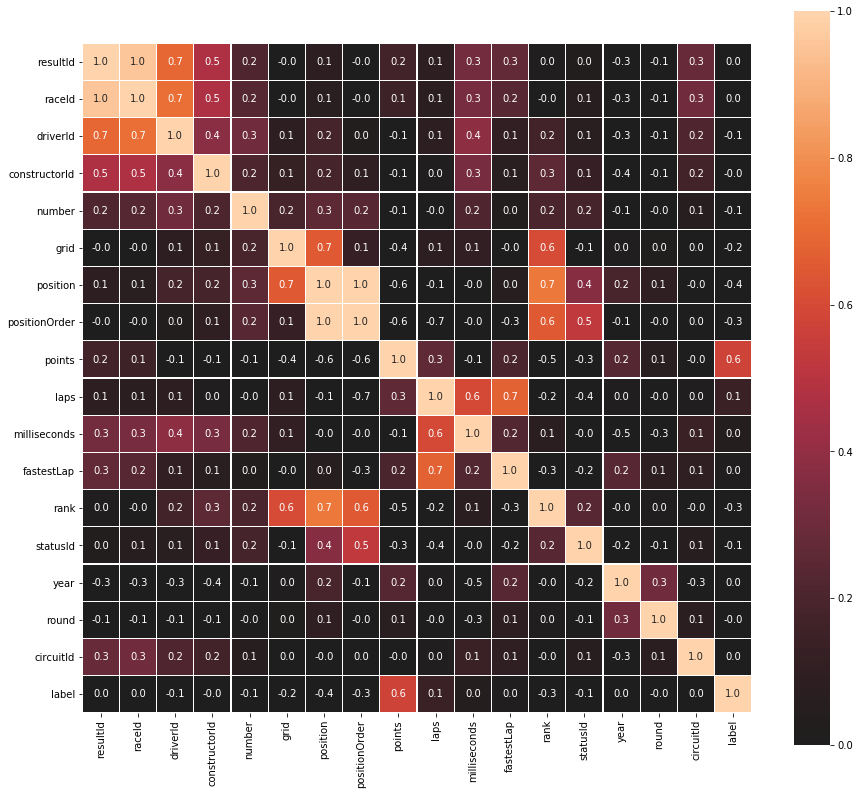

In [103]:
#Importing the seaborn and matplot lib libraries for visualization of the correlation matrix 

import matplotlib.pyplot as plt
import seaborn as sns

def correlation_heatmap(combineddata):
    correlations = combineddata.corr()

    fig, ax = plt.subplots(figsize=(15,15))
    sns.heatmap(correlations, vmax=1.0, vmin=0, center = 0, fmt='.1f',
                square=True, linewidths=.2, annot=True, cbar_kws={"shrink": .90})
    plt.show();
    
correlation_heatmap(combineddata)

- From the correlation matrix above we can see there is a high correlation between position and rank, grid and rank, resultid and driverid, points and label. 
- The rest of the combinations between variables are close to 0 so we can conclude there is no relationship amongst them.

# Note - need to bring in additional datasets for a better conclusion and meaningfulness!